## Setup for AWS notebook -- upgrade tensorflow
The AWS notebook conda_tensorflow2_p36 comes with Tensorflow 2.1.0. 

To get required functionality, upgrade to at least 2.3.0.

In [1]:
pip install --upgrade tensorflow==2.3.0

     |█████████████████████████████▌  | 295.2 MB 111.7 MB/s eta 0:00:01

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



     |████████████████████████████████| 320.4 MB 28 kB/s               
     |████████████████████████████████| 26.1 MB 123.6 MB/s            
     |████████████████████████████████| 459 kB 126.0 MB/s            
     |████████████████████████████████| 42 kB 2.4 MB/s              
     |████████████████████████████████| 5.8 MB 131.2 MB/s            
     |████████████████████████████████| 781 kB 78.1 MB/s            
     |████████████████████████████████| 4.9 MB 116.7 MB/s            
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.1.0
    Uninstalling tensorflow-estimator-2.1.0:
      Successfully uninstalled tensorflow-estimator-2.1.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.1.1
    Uninstalling tensorboard-2.1.1:
      Successfully uninstalled tensorboard-2.1.1
  Attempting uninstall: scipy
    Found existing installation: scipy 1.5.3
    Uninstalling scipy-1.5.3:
      Successfully unins

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-serving-api 2.1.0 requires tensorflow~=2.1.0, but you have tensorflow 2.3.0 which is incompatible.
tensorflow-gpu 2.1.3 requires gast==0.2.2, but you have gast 0.3.3 which is incompatible.
tensorflow-gpu 2.1.3 requires keras-preprocessing==1.1.0, but you have keras-preprocessing 1.1.2 which is incompatible.
tensorflow-gpu 2.1.3 requires tensorboard<2.2.0,>=2.1.0, but you have tensorboard 2.8.0 which is incompatible.
tensorflow-gpu 2.1.3 requires tensorflow-estimator<2.2.0,>=2.1.0rc0, but you have tensorflow-estimator 2.3.0 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


### NEED TO RESTART KERNEL AFTER UPDATE!!!

In [2]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [3]:
print(tf.__version__)

2.3.0


In [6]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

# Training summary
We first tried several different types of architectures: 
1. ResNet50
2. VGG16
3. EfficientNetB4

The best performing architecture seems to be EfficientNetB4.

As the next step we continue with EfficientNet and experiment with
1. adding additional 4000 examples of malignant images to the training data for balancing.
2. using a learning rate scheduler

## ResNet with Dense(256), Dropout(0.5)

In [ ]:
%run train.py --enet-type ResNet --n-epochs 5 --img-width 256 --img-height 256

## VGG16 with Dense(256), Dropout(0.5)

In [ ]:
%run train.py --enet-type VGG16 --n-epochs 5

## EfficientNetB4 

Architecture: EfficientNet

Train examples: 33126
Number of malignant: 584
Number of benign: 32542
Class weights: {0: 0.5089730194825148, 1: 28.36130136986301}

Epoch 1/10
1635/1634 [==============================] - 184s 113ms/step - loss: 0.6020 - AUC: 0.7403 - accuracy: 0.6882 - precision: 0.0365 - recall: 0.6502 - val_loss: 0.6151 - val_AUC: 0.8536 - val_accuracy: 0.6645 - val_precision: 0.0443 - val_recall: 0.8783
Epoch 2/10
1635/1634 [==============================] - 181s 111ms/step - loss: 0.5211 - AUC: 0.8202 - accuracy: 0.7348 - precision: 0.0476 - recall: 0.7281 - val_loss: 0.6254 - val_AUC: 0.8641 - val_accuracy: 0.6619 - val_precision: 0.0440 - val_recall: 0.8783
Epoch 3/10
1635/1634 [==============================] - 182s 111ms/step - loss: 0.4891 - AUC: 0.8440 - accuracy: 0.7514 - precision: 0.0516 - recall: 0.7446 - val_loss: 0.6131 - val_AUC: 0.8676 - val_accuracy: 0.6800 - val_precision: 0.0472 - val_recall: 0.8957
Epoch 4/10
1635/1634 [==============================]

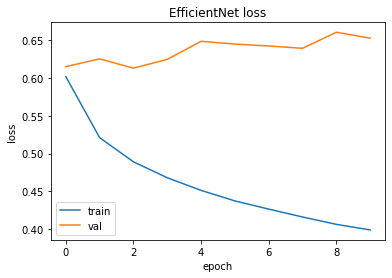

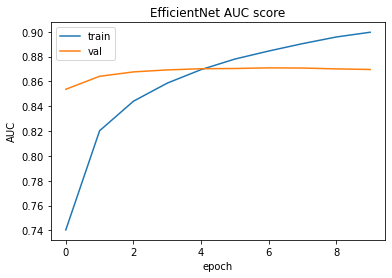

In [1]:
%run train.py --enet-type EfficientNet --n-epochs 10

## EfficientNetB4 with Dense(256), Dropout(0.5)

In [ ]:
# EfficientNetB4 

%run train.py --enet-type EfficientNet --n-epochs 1

## EfficientNetB4 with additional malignant data

Architecture: EfficientNet

Train examples: 37102
Number of malignant: 4560
Number of benign: 32542
Class weights: {0: 0.570063302808678, 1: 4.068201754385965}

Epoch 1/7
1883/1882 [==============================] - 207s 110ms/step - loss: 0.5085 - AUC: 0.8919 - accuracy: 0.8224 - precision: 0.4438 - recall: 0.8103 - val_loss: 3.6115 - val_AUC: 0.7524 - val_accuracy: 0.0229 - val_precision: 0.0177 - val_recall: 1.0000
Epoch 2/7
1883/1882 [==============================] - 204s 108ms/step - loss: 0.4185 - AUC: 0.9258 - accuracy: 0.8479 - precision: 0.4908 - recall: 0.8515 - val_loss: 3.4307 - val_AUC: 0.7782 - val_accuracy: 0.0378 - val_precision: 0.0180 - val_recall: 1.0000
Epoch 3/7
1883/1882 [==============================] - 204s 108ms/step - loss: 0.3901 - AUC: 0.9349 - accuracy: 0.8583 - precision: 0.5114 - recall: 0.8671 - val_loss: 3.3819 - val_AUC: 0.7968 - val_accuracy: 0.0496 - val_precision: 0.0182 - val_recall: 1.0000
Epoch 4/7
1883/1882 [==============================] - 2

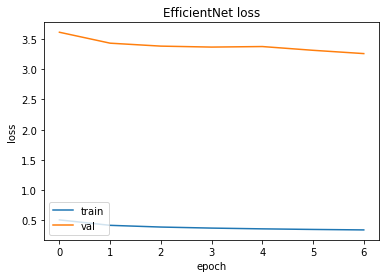

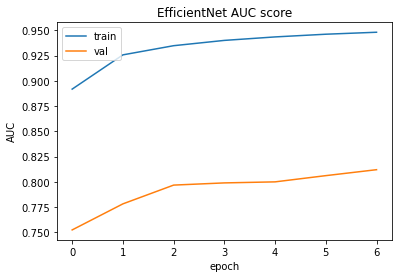

In [1]:
%run train.py --enet-type EfficientNet --n-epochs 7 --add-malig True

## EfficientNet with learning rate scheduler

Architecture: EfficientNet

Train examples: 37102
Number of malignant: 4560
Number of benign: 32542
Class weights: {0: 0.570063302808678, 1: 4.068201754385965}

Epoch 1/10
1883/1882 [==============================] - ETA: 0s - loss: 0.7657 - AUC: 0.5977 - accuracy: 0.8193 - precision: 0.3077 - recall: 0.1809
Epoch 00001: val_AUC improved from -inf to 0.49080, saving model to results/saved_models/EfficientNet_model_best_auc.h5

Epoch 00001: val_loss improved from inf to 0.60674, saving model to results/saved_models/EfficientNet_model_best_loss.h5
1883/1882 [==============================] - 207s 110ms/step - loss: 0.7657 - AUC: 0.5977 - accuracy: 0.8193 - precision: 0.3077 - recall: 0.1809 - val_loss: 0.6067 - val_AUC: 0.4908 - val_accuracy: 0.7932 - val_precision: 0.0111 - val_recall: 0.1217
Epoch 2/10
1883/1882 [==============================] - ETA: 0s - loss: 0.7096 - AUC: 0.6964 - accuracy: 0.7309 - precision: 0.2789 - recall: 0.5208
Epoch 00002: val_AUC improved from 0.49080 to 0.

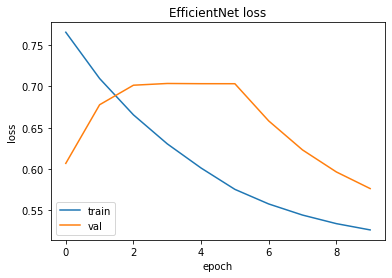

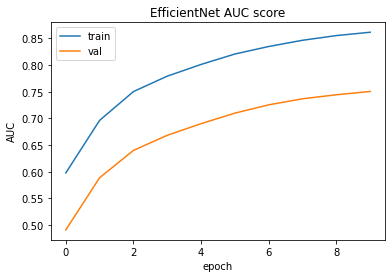

In [1]:
%run train.py --enet-type EfficientNet --n-epochs 10 --add-malig True

# Predict

In [1]:
# predict.py
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 

%run predict.py --enet-type EfficientNet

[[0.18508963]
 [0.46752784]
 [0.6186132 ]
 ...
 [0.20353061]
 [0.07563965]
 [0.50906146]]


IndexError: index 1 is out of bounds for axis 0 with size 1

# Evaluate

115

Confusion matrix:
[[4343 2079]
 [  10  105]]

AUC score: 0.8707743761255466

Accuracy: 0.6804344500535414

Classification report:
              precision    recall  f1-score   support

           0       1.00      0.68      0.81      6422
           1       0.05      0.91      0.09       115

    accuracy                           0.68      6537
   macro avg       0.52      0.79      0.45      6537
weighted avg       0.98      0.68      0.79      6537



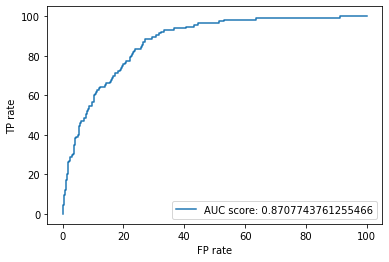

In [3]:
%run evaluate.py 

In [2]:
#%run ensemble.py

In [2]:
# predict.py
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 

%run predict.py --enet-type EfficientNet



[[0.05984455]
 [0.24951899]
 [0.54958713]
 ...
 [0.10985049]
 [0.09672004]
 [0.48390245]]
Predictions saved to 'results/predictions/predictions-EfficientNet.csv'.


### Version checking

In [2]:

import tensorflow, sklearn, pandas, numpy, re, matplotlib

print("tensorflow==" + tensorflow.__version__)
print("sklearn==" + sklearn.__version__)
print("pandas==" + pandas.__version__)
print("numpy==" + numpy.__version__)
print("re==" + re.__version__)
print("matplotlib==" + matplotlib.__version__)


tensorflow==2.3.0
sklearn==0.24.1
pandas==1.1.5
numpy==1.18.5
re==2.2.1
matplotlib==3.3.4
